In [3]:
import requests

base_url = 'https://api.dane.gov.pl/1.4'
params = {
    'page': 1,
    'per_page': 100,
    'sort': 'id'
}

all_resources = []
while True:
    response = requests.get(base_url + '/resources', params=params)
    if response.status_code == 200:
        try:
            data = response.json()
            resources = data.get('data')
            for resource in resources:
                resource_attributes = resource.get('attributes', {})
                resource_relationships = resource.get('relationships', {})
                all_resources.append(
                    {
                        'id': resource.get('id'),
                        'title': resource_attributes.get('title'),
                        'format': resource_attributes.get('format'),
                        'openess': resource_attributes.get('openness_score'),
                        'file_url': resource_attributes.get('file_url'),
                        'tabular_data_available': 1 if resource_relationships.get('tabular_data') else 0,
                        'file_size': resource_attributes.get('file_size'),
                        'description': resource_attributes.get('description'),
                        'media_type': resource_attributes.get('media_type'),
                        'visualization_types': resource_attributes.get('visualization_types'),
                        'institution_id': resource_relationships.get('institution').get('data').get('id'),
                        'dataset_id': resource_relationships.get('dataset').get('data').get('id'),
                    }
                )
            if 'next' in data.get('links'):
                params['page'] += 1
            else:
                break
        except Exception as e:
            print(f'Error: {e}')
            break
    else:
        print(f'Failed to fetch data {params}. Status code: {response.status_code}')
        break

In [25]:
from collections import defaultdict

format_counter = defaultdict(int)
for resource in all_resources:
    format_counter[resource['format']] += 1

for format, count in format_counter.items():
    print(f"{format}: {count}")

pdf: 408
doc: 104
xls: 1044
xlsx: 1843
csv: 4774
docx: 8
zip: 249
xml: 131
html: 1316
rtf: 1
7z: 2
rdf: 5
png: 3
None: 46
json: 35
php: 21
txt: 5
rar: 2
odt: 3


In [26]:
openess_counter = defaultdict(int)
for resource in all_resources:
    openess_counter[resource['openess']] += 1

for openess, count in openess_counter.items():
    print(f"{openess}: {count}")

1: 619
2: 2891
3: 6342
4: 101
0: 47


In [6]:
from collections import defaultdict

format_counter = defaultdict(int)
for resource in all_resources:
    format_counter[resource['media_type']] += 1

for format, count in format_counter.items():
    print(f"{format}: {count}")

file: 9787
website: 147
api: 66


In [8]:
from collections import defaultdict

institution_counter = defaultdict(int)
for resource in all_resources:
    if resource['tabular_data_available'] == 1:
        institution_counter[resource['institution_id']] += 1
        print(f"{resource['id']} {resource['institution_id']} {resource['dataset_id']} {resource['format']} {resource['media_type']} {resource['openess']} {resource['file_size']} {resource['visualization_types']}")

29 139 931 xlsx file 2 10568 []
59 20 529 xls file 2 67072 []
159 202 333 csv file 3 60251 []
165 25 196 csv file 3 3407 []
246 19 524 csv file 3 1320 []
255 19 524 csv file 3 1320 []
272 19 524 csv file 3 1320 []
345 150 221 csv file 3 2381 []
356 150 221 csv file 3 2381 []
385 150 221 csv file 3 2381 []
395 150 221 csv file 3 15837 []
415 150 221 csv file 3 15475 []
424 150 221 csv file 3 2381 []
431 150 221 csv file 3 19878 []
438 150 221 csv file 3 15475 []
466 150 221 csv file 3 2381 []
485 98 472 csv file 3 30451 []
486 150 221 csv file 3 14246 []
498 150 221 csv file 3 19160 []
605 165 1135 xlsx file 2 16922 []
610 130 662 csv file 3 121315 []
716 98 472 xlsx file 2 35559 []
765 98 472 csv file 3 25247 []
895 34 950 xls file 2 1128448 []
957 34 1119 xls file 2 680960 []
1006 103 457 csv file 3 4410 []
1007 26 897 xls file 2 791040 []
1008 103 457 csv file 3 1857 []
1012 26 980 csv file 4 891 []
1013 26 685 xls file 2 122368 []
1044 26 894 csv file 4 157 []
1050 103 457 csv file 

In [10]:
total_count = sum(institution_counter.values())
for institution, count in institution_counter.items():
    print(f"{institution}: {count} ({count/total_count*100:.2f}%)")

139: 8 (0.37%)
20: 20 (0.92%)
202: 12 (0.55%)
25: 1 (0.05%)
19: 1891 (86.54%)
150: 27 (1.24%)
98: 18 (0.82%)
165: 8 (0.37%)
130: 5 (0.23%)
34: 2 (0.09%)
103: 9 (0.41%)
26: 27 (1.24%)
333: 29 (1.33%)
82: 1 (0.05%)
83: 1 (0.05%)
107: 4 (0.18%)
33: 1 (0.05%)
84: 3 (0.14%)
21: 2 (0.09%)
31: 4 (0.18%)
27: 8 (0.37%)
23: 1 (0.05%)
81: 1 (0.05%)
69: 1 (0.05%)
57: 1 (0.05%)
78: 1 (0.05%)
110: 1 (0.05%)
37: 30 (1.37%)
13: 2 (0.09%)
95: 4 (0.18%)
30: 7 (0.32%)
32: 6 (0.27%)
106: 2 (0.09%)
16: 4 (0.18%)
24: 12 (0.55%)
51: 1 (0.05%)
126: 4 (0.18%)
133: 6 (0.27%)
143: 2 (0.09%)
108: 3 (0.14%)
131: 1 (0.05%)
145: 14 (0.64%)


In [29]:
tab_data_available_counter = defaultdict(int)
for resource in all_resources:
    tab_data_available_counter[resource['tabular_data_available']] += 1

total = sum(tab_data_available_counter.values())
for item, count in tab_data_available_counter.items():
    print(f"{item}: {count} ({count/total*100:.2f}%)")

0: 7815 (78.15%)
1: 2185 (21.85%)


In [28]:
for resource in all_resources[:10000]:
    if resource['tabular_data_available']:
        print(resource)

{'id': '29', 'title': 'Liczba skarg złożonych do Urzędu Morskiego w Szczecinie jako organu odwoławczego', 'format': 'xlsx', 'openess': 2, 'file_url': 'https://api.dane.gov.pl/media/resources/20171212/LiczbaskargzlozonychdoUMSjakoorganuodwolawczego.xlsx', 'tabular_data_available': 1, 'file_size': 10568, 'description': '<p>Liczba skarg złożonych do Urzędu Morskiego w Szczecinie jako organu odwoławczego</p>\n'}
{'id': '59', 'title': 'Ubezpieczeni (osoby fizyczne) w ubezpieczeniu chorobowym według województw IV kwartał 2015', 'format': 'xls', 'openess': 2, 'file_url': 'https://api.dane.gov.pl/media/resources/20160927/fa9a6cb4-e3e5-438a-9058-f9980a569015.xls', 'tabular_data_available': 1, 'file_size': 67072, 'description': '<p></p>\n'}
{'id': '159', 'title': 'Inwestycje sportowe FRKF 2014 r.', 'format': 'csv', 'openess': 3, 'file_url': 'https://api.dane.gov.pl/media/resources/20150703/FRKF-inwestycje-2014.csv', 'tabular_data_available': 1, 'file_size': 60251, 'description': '<p>Inwestycje s

Liczba zasobów z informacją o rozmiarze: 9537
Liczba zasobów bez informacji o rozmiarze: 463

=== STATYSTYKI ROZMIARÓW PLIKÓW ===
Minimum: 91 bajtów (0.00 MB)
Maksimum: 1,440,887,423 bajtów (1374.14 MB)
Średnia: 8,240,478 bajtów (7.86 MB)
Mediana: 184,083 bajtów (0.18 MB)
Odchylenie standardowe: 26,626,336 bajtów (25.39 MB)

=== PERCENTYLE ===
10% plików ma rozmiar ≤ 1,983 bajtów (0.00 MB)
25% plików ma rozmiar ≤ 12,160 bajtów (0.01 MB)
50% plików ma rozmiar ≤ 184,083 bajtów (0.18 MB)
75% plików ma rozmiar ≤ 4,655,986 bajtów (4.44 MB)
90% plików ma rozmiar ≤ 39,205,228 bajtów (37.39 MB)
95% plików ma rozmiar ≤ 73,298,956 bajtów (69.90 MB)
99% plików ma rozmiar ≤ 77,517,402 bajtów (73.93 MB)

=== ROZKŁAD PO KATEGORIACH ===
1 KB - 1 MB: 5879 plików (61.6%)
1 MB - 10 MB: 2119 plików (22.2%)
10 MB - 100 MB: 1274 plików (13.4%)
< 1 KB: 258 plików (2.7%)
100 MB - 1 GB: 6 plików (0.1%)
> 1 GB: 1 plików (0.0%)


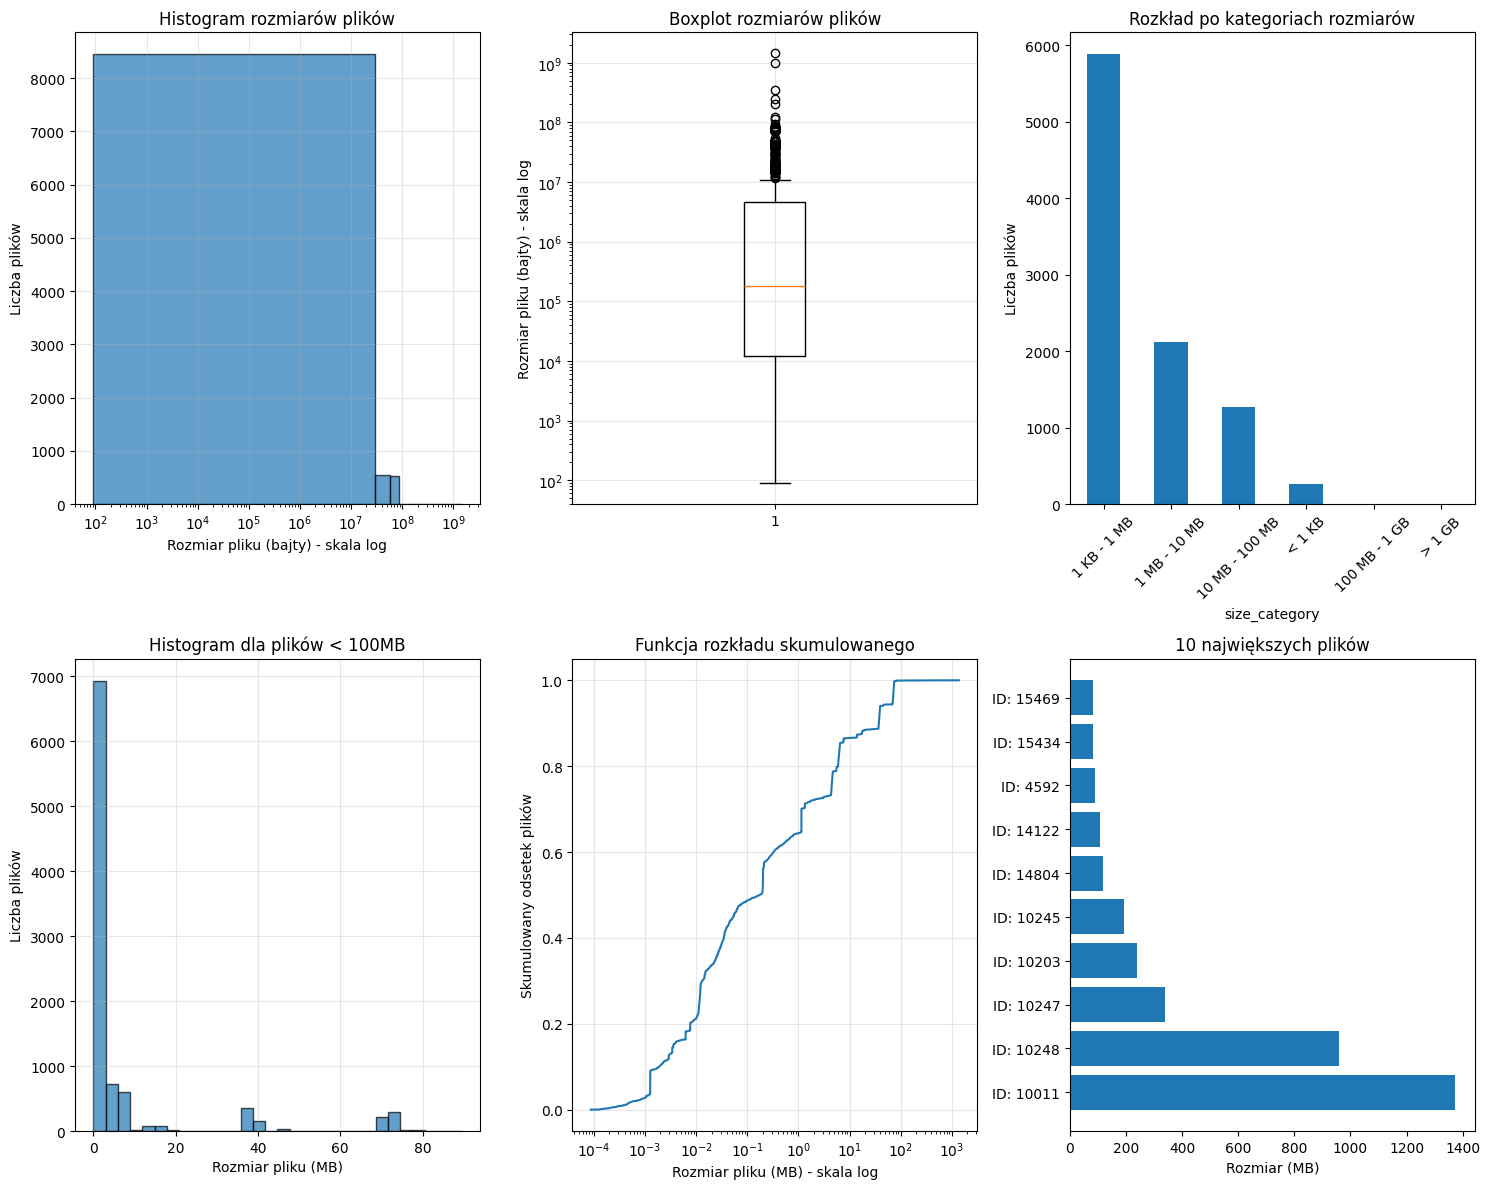


=== ŚREDNI ROZMIAR WEDŁUG FORMATÓW ===
        Liczba  Średnia (bajty)  Mediana (bajty)   Max (bajty)  Średnia (MB)  Mediana (MB)  Max (MB)
format                                                                                              
zip        231      25657913.46       14631386.0  1.440887e+09         24.47         13.95   1374.14
html      1183      21689551.94        7983814.0  4.909122e+07         20.68          7.61     46.82
rar          2      17609192.50       17609192.5  2.344307e+07         16.79         16.79     22.36
odt          3      11287607.67        9716375.0  2.339975e+07         10.76          9.27     22.32
csv       4745       9360388.12         209672.0  1.229988e+08          8.93          0.20    117.30
pdf        241       2515124.98        1327298.0  5.164095e+07          2.40          1.27     49.25
xml         88       1427312.60          15771.0  9.377979e+07          1.36          0.02     89.44
png          3       1357866.67         454066.0  3

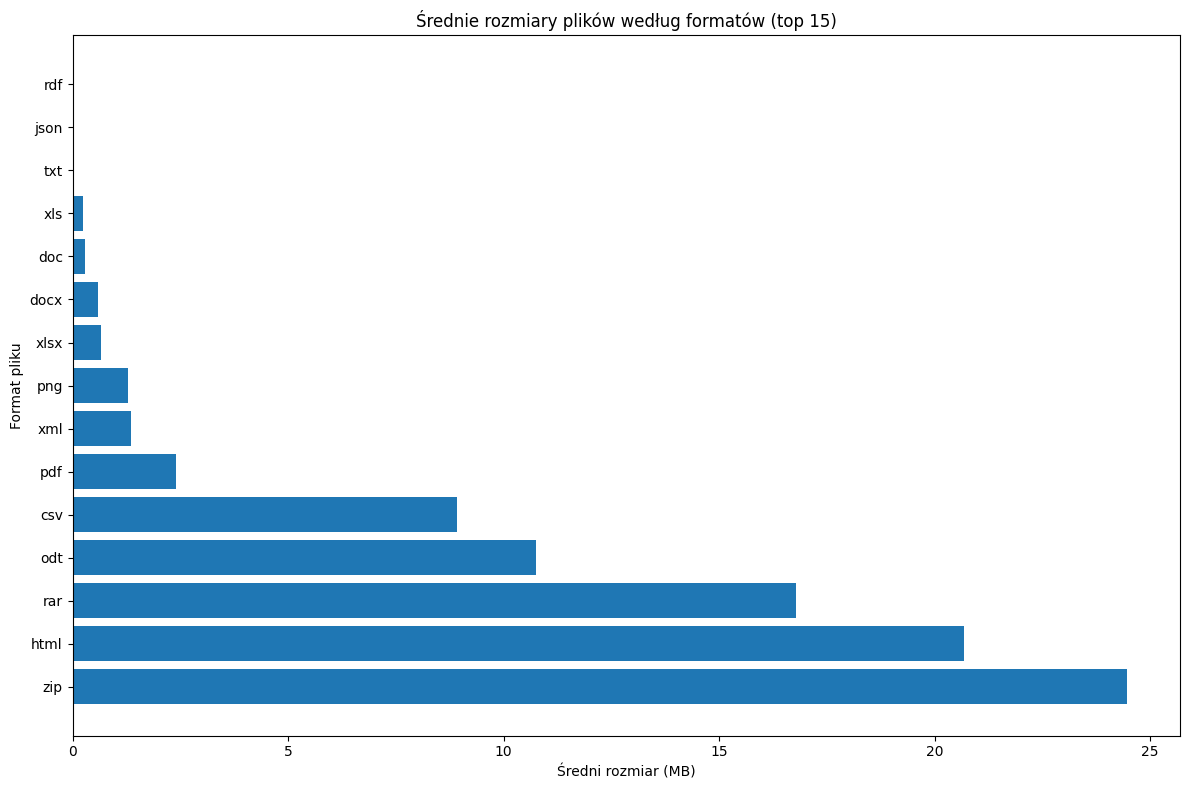


=== TOP 10 NAJWIĘKSZYCH PLIKÓW ===
Dane archiwalne dostępne offline - 2016 r.... | zip | 1.3 GB
Dane archiwalne dostępne offline - 2017 r.... | zip | 960.8 MB
Dane archiwalne dostępne offline - 2015 r.... | zip | 339.3 MB
Dane archiwalne dostępne offline - 2013 r.... | zip | 237.9 MB
Dane archiwalne dostępne offline - 2014 r.... | zip | 191.2 MB
Lista projektów realizowanych z Funduszy Europejsk... | csv | 117.3 MB
Lista projektów realizowanych z Funduszy Europejsk... | csv | 108.7 MB
Krajowy Plan Zarządzania Kryzysowego... | xml | 89.4 MB
2019_02_07_listaZnakowTowarowych... | csv | 80.9 MB
2019_02_08_listaZnakowTowarowych... | csv | 80.9 MB


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Zakładając, że masz już zmienną all_resources z danymi
# Konwertuj na DataFrame
df = pd.DataFrame(all_resources)

# Usuń wiersze gdzie file_size jest None/null
df_with_size = df[df['file_size'].notna()].copy()
df_with_size['file_size'] = pd.to_numeric(df_with_size['file_size'], errors='coerce')
df_with_size = df_with_size[df_with_size['file_size'] > 0]

print(f"Liczba zasobów z informacją o rozmiarze: {len(df_with_size)}")
print(f"Liczba zasobów bez informacji o rozmiarze: {len(df) - len(df_with_size)}")

# Podstawowe statystyki rozmiarów (w bajtach)
file_sizes = df_with_size['file_size']

print("\n=== STATYSTYKI ROZMIARÓW PLIKÓW ===")
print(f"Minimum: {file_sizes.min():,.0f} bajtów ({file_sizes.min() / (1024**2):.2f} MB)")
print(f"Maksimum: {file_sizes.max():,.0f} bajtów ({file_sizes.max() / (1024**2):.2f} MB)")
print(f"Średnia: {file_sizes.mean():,.0f} bajtów ({file_sizes.mean() / (1024**2):.2f} MB)")
print(f"Mediana: {file_sizes.median():,.0f} bajtów ({file_sizes.median() / (1024**2):.2f} MB)")
print(f"Odchylenie standardowe: {file_sizes.std():,.0f} bajtów ({file_sizes.std() / (1024**2):.2f} MB)")

# Percentyle
percentiles = [10, 25, 50, 75, 90, 95, 99]
print(f"\n=== PERCENTYLE ===")
for p in percentiles:
    size_bytes = np.percentile(file_sizes, p)
    size_mb = size_bytes / (1024**2)
    print(f"{p}% plików ma rozmiar ≤ {size_bytes:,.0f} bajtów ({size_mb:.2f} MB)")

# Kategorie rozmiarów
def categorize_size(size_bytes):
    if size_bytes < 1024:
        return "< 1 KB"
    elif size_bytes < 1024**2:
        return "1 KB - 1 MB"
    elif size_bytes < 10 * 1024**2:
        return "1 MB - 10 MB"
    elif size_bytes < 100 * 1024**2:
        return "10 MB - 100 MB"
    elif size_bytes < 1024**3:
        return "100 MB - 1 GB"
    else:
        return "> 1 GB"

df_with_size['size_category'] = df_with_size['file_size'].apply(categorize_size)
size_distribution = df_with_size['size_category'].value_counts()

print(f"\n=== ROZKŁAD PO KATEGORIACH ===")
for category, count in size_distribution.items():
    percentage = (count / len(df_with_size)) * 100
    print(f"{category}: {count} plików ({percentage:.1f}%)")

# Wykresy
plt.figure(figsize=(15, 12))

# 1. Histogram rozmiarów (skala logarytmiczna)
plt.subplot(2, 3, 1)
plt.hist(file_sizes, bins=50, alpha=0.7, edgecolor='black')
plt.xscale('log')
plt.xlabel('Rozmiar pliku (bajty) - skala log')
plt.ylabel('Liczba plików')
plt.title('Histogram rozmiarów plików')
plt.grid(True, alpha=0.3)

# 2. Boxplot rozmiarów (skala logarytmiczna)
plt.subplot(2, 3, 2)
plt.boxplot(file_sizes)
plt.yscale('log')
plt.ylabel('Rozmiar pliku (bajty) - skala log')
plt.title('Boxplot rozmiarów plików')
plt.grid(True, alpha=0.3)

# 3. Rozkład po kategoriach
plt.subplot(2, 3, 3)
size_distribution.plot(kind='bar', rot=45)
plt.title('Rozkład po kategoriach rozmiarów')
plt.ylabel('Liczba plików')
plt.tight_layout()

# 4. Histogram w MB dla czytelności (tylko pliki < 100MB)
plt.subplot(2, 3, 4)
small_files = file_sizes[file_sizes < 100 * 1024**2] / (1024**2)  # Konwersja na MB
plt.hist(small_files, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Rozmiar pliku (MB)')
plt.ylabel('Liczba plików')
plt.title('Histogram dla plików < 100MB')
plt.grid(True, alpha=0.3)

# 5. Cumulative distribution
plt.subplot(2, 3, 5)
sorted_sizes = np.sort(file_sizes)
cumulative = np.arange(1, len(sorted_sizes) + 1) / len(sorted_sizes)
plt.plot(sorted_sizes / (1024**2), cumulative)
plt.xscale('log')
plt.xlabel('Rozmiar pliku (MB) - skala log')
plt.ylabel('Skumulowany odsetek plików')
plt.title('Funkcja rozkładu skumulowanego')
plt.grid(True, alpha=0.3)

# 6. Top 10 największych plików
plt.subplot(2, 3, 6)
top_10 = df_with_size.nlargest(10, 'file_size')
top_10_sizes = top_10['file_size'] / (1024**2)  # MB
plt.barh(range(len(top_10)), top_10_sizes)
plt.xlabel('Rozmiar (MB)')
plt.title('10 największych plików')
plt.yticks(range(len(top_10)), [f"ID: {id}" for id in top_10['id']])

plt.tight_layout()
plt.show()

# Analiza według formatów
print(f"\n=== ŚREDNI ROZMIAR WEDŁUG FORMATÓW ===")
format_stats = df_with_size.groupby('format').agg({
    'file_size': ['count', 'mean', 'median', 'max']
}).round(2)

format_stats.columns = ['Liczba', 'Średnia (bajty)', 'Mediana (bajty)', 'Max (bajty)']
format_stats['Średnia (MB)'] = (format_stats['Średnia (bajty)'] / (1024**2)).round(2)
format_stats['Mediana (MB)'] = (format_stats['Mediana (bajty)'] / (1024**2)).round(2)
format_stats['Max (MB)'] = (format_stats['Max (bajty)'] / (1024**2)).round(2)

# Sortuj według średniego rozmiaru
format_stats_sorted = format_stats.sort_values('Średnia (bajty)', ascending=False)
print(format_stats_sorted.to_string())

# Wykres średnich rozmiarów według formatów (top 15)
plt.figure(figsize=(12, 8))
top_formats = format_stats_sorted.head(15)
plt.barh(range(len(top_formats)), top_formats['Średnia (MB)'])
plt.xlabel('Średni rozmiar (MB)')
plt.ylabel('Format pliku')
plt.title('Średnie rozmiary plików według formatów (top 15)')
plt.yticks(range(len(top_formats)), top_formats.index)
plt.tight_layout()
plt.show()

# Funkcja pomocnicza do konwersji bajtów na czytelny format
def format_bytes(bytes_size):
    if bytes_size < 1024:
        return f"{bytes_size:.0f} B"
    elif bytes_size < 1024**2:
        return f"{bytes_size/1024:.1f} KB"
    elif bytes_size < 1024**3:
        return f"{bytes_size/(1024**2):.1f} MB"
    else:
        return f"{bytes_size/(1024**3):.1f} GB"

print(f"\n=== TOP 10 NAJWIĘKSZYCH PLIKÓW ===")
for i, row in top_10.iterrows():
    print(f"{row['title'][:50]}... | {row['format']} | {format_bytes(row['file_size'])}")

In [4]:
# NAJWIĘKSZY PLIK Z KAŻDEGO FORMATU
print("=== NAJWIĘKSZY PLIK Z KAŻDEGO FORMATU ===\n")

# Usuń wiersze gdzie file_size jest None/null
df_with_size = df[df['file_size'].notna()].copy()
df_with_size['file_size'] = pd.to_numeric(df_with_size['file_size'], errors='coerce')
df_with_size = df_with_size[df_with_size['file_size'] > 0]

# Znajdź największy plik dla każdego formatu
largest_by_format = df_with_size.groupby('format').apply(
    lambda x: x.loc[x['file_size'].idxmax()]
).reset_index(drop=True)

# Sortuj według rozmiaru pliku (od największego)
largest_by_format = largest_by_format.sort_values('file_size', ascending=False)

# Funkcja do formatowania bajtów
def format_bytes(bytes_size):
    if bytes_size < 1024:
        return f"{bytes_size:.0f} B"
    elif bytes_size < 1024**2:
        return f"{bytes_size/1024:.1f} KB"
    elif bytes_size < 1024**3:
        return f"{bytes_size/(1024**2):.1f} MB"
    else:
        return f"{bytes_size/(1024**3):.1f} GB"

# Wyświetl wyniki
for i, row in largest_by_format.iterrows():
    print(f"FORMAT: {row['format'].upper()}")
    print(f"  Rozmiar: {format_bytes(row['file_size'])}")
    print(f"  Tytuł: {row['title']}")
    print(f"  ID: {row['id']}")
    print(f"  URL: {row['file_url']}")
    print(f"  Opis: {row['description'][:100] if row['description'] else 'Brak opisu'}...")
    print("-" * 80)

# Utwórz też tabelę podsumowującą
summary_table = largest_by_format[['format', 'file_size', 'title', 'id']].copy()
summary_table['size_formatted'] = summary_table['file_size'].apply(format_bytes)
summary_table['title_short'] = summary_table['title'].str[:50] + '...'

print(f"\n=== PODSUMOWANIE - NAJWIĘKSZE PLIKI PO FORMATACH ===")
print(f"{'Format':<10} {'Rozmiar':<12} {'ID':<6} {'Tytuł':<52}")
print("=" * 80)

for _, row in summary_table.iterrows():
    print(f"{row['format']:<10} {row['size_formatted']:<12} {row['id']:<6} {row['title_short']:<52}")

print(f"\nZnaleziono największe pliki dla {len(largest_by_format)} formatów.")


=== NAJWIĘKSZY PLIK Z KAŻDEGO FORMATU ===

FORMAT: ZIP
  Rozmiar: 1.3 GB
  Tytuł: Dane archiwalne dostępne offline - 2016 r.
  ID: 10011
  URL: https://api.dane.gov.pl/media/resources/20170719/2016.zip
  Opis: <p>Link do danych w formacie CSV. Do pobrania w formie archiwum ZIP zawierających dane zebrane w 201...
--------------------------------------------------------------------------------
FORMAT: CSV
  Rozmiar: 117.3 MB
  Tytuł: Lista projektów realizowanych z Funduszy Europejskich w Polsce w latach 2014-2020 - 31 grudnia 2018 r.
  ID: 14804
  URL: https://api.dane.gov.pl/media/resources/20190107/Lista_projektow_FE_2014_2020_181231.csv
  Opis: <p>Lista projektów realizowanych z Funduszy Europejskich w Polsce w latach 2014-2020 - 31 grudnia 20...
--------------------------------------------------------------------------------
FORMAT: XML
  Rozmiar: 89.4 MB
  Tytuł: Krajowy Plan Zarządzania Kryzysowego
  ID: 4592
  URL: https://api.dane.gov.pl/media/resources/20170327/KPZK-2013-2015.t

/var/folders/0h/89t_dtjn5y17tt6nn628qzyw0000gp/T/ipykernel_33775/2412014942.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  largest_by_format = df_with_size.groupby('format').apply(
